In [16]:
import pandas as pd
from itertools import product

In [51]:
df = pd.read_csv("data/cars-pivot.csv")
df.head()

,STM,Month,Day,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,SUMA
0,2,1,Weekend,5.516129,4.258065,2.935484,2.580645,1.516129,5.064516,6.354839,...,46.548387,41.870968,45.064516,40.096774,38.258065,27.000000,16.290323,12.225806,5.677419,SUMA1
1,2,1,Workday,2.112903,1.096774,0.725806,0.532258,0.532258,7.370968,11.580645,...,73.000000,61.790323,68.725806,54.209677,41.451613,27.741935,16.693548,15.225806,5.919355,SUMA1
2,2,2,Weekend,5.807692,4.346154,3.500000,2.923077,2.076923,4.923077,5.961538,...,45.615385,38.846154,41.615385,39.884615,33.000000,22.115385,15.846154,11.461538,6.269231,SUMA1
3,2,2,Workday,2.372881,1.627119,0.728814,0.661017,0.661017,7.322034,11.542373,...,69.677966,62.186441,68.033898,55.135593,41.338983,29.576271,17.610169,14.830508,6.101695,SUMA1
4,2,3,Weekend,7.307692,4.689655,3.217391,2.807692,1.692308,6.038462,7.846154,...,55.423077,45.384615,43.461538,40.423077,40.192308,28.500000,18.576923,11.538462,7.307692,SUMA1


First, we will remove the counters that have errors in the data, that is the counters, which report all zeros for all hours of the month.

In [59]:
idx = []
# remove counters where values for all hours are 0
for stm, day, direction in list(product(set(df['STM'].values), set(df['Day'].values), set(df['SUMA'].values))):
    subset = df[(df['STM'] == stm) & (df['Day'] == day) & (df['SUMA'] == direction)]
    index = subset.index
    subset = subset[~(subset.drop(['STM', 'Month', 'Day', 'SUMA'], axis=1) == 0).all(axis=1)]
    if len(subset) != 12:
        idx.extend(index)

In [63]:
df = df.drop(idx)

# Absolute difference to the mean

In [88]:
def absolute_to_baseline(df):
    out = df.copy()
    for stm, day, direction in list(product(set(df['STM'].values), 
                                            set(df['Day'].values), 
                                            set(df['SUMA'].values))):
        for hour in set(df.columns.drop(['STM', 'Month', 'Day', 'SUMA'])):
            index = df[(df['STM'] == stm) & (df['Day'] == day) & (df['SUMA'] == direction)].index
            baseline = df.loc[index][hour].sort_values()[:4].mean()
            out.loc[index, hour] = df[hour] - baseline
    return out

In [89]:
# Computation is quite lengthy. Pre-computed dataset is available in the repository.
absolute = absolute_to_baseline(df)

In [93]:
# Load pre-computed data set.
absolute = pd.read_csv('data/cars-absolute.csv')
absolute['SUM'] = absolute.drop(['STM', 'Month', 'Day', 'SUMA'], axis=1).sum(axis=1)
absolute.sort_values(by='SUM', ascending=False).head(10)

,STM,Month,Day,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,SUMA,SUM
29966,897,8,Weekend,597.818189,525.056630,407.645288,345.870899,391.065721,506.069366,662.418590,...,838.133522,868.141300,1139.258066,1421.461811,1473.090124,1494.446611,1339.287180,855.812711,SUMA2,22996.072456
13502,854,8,Weekend,306.600270,303.427945,353.286734,451.663448,676.897782,1083.948828,1623.304901,...,984.115887,898.988402,755.034066,759.972138,682.815594,556.914174,432.272297,317.213370,SUMA1,22472.097856
29964,897,7,Weekend,522.461046,442.485202,351.181002,338.120899,359.530006,441.462223,514.275733,...,811.812094,856.355585,1050.865209,1334.426097,1498.197267,1486.946611,1283.965751,909.526997,SUMA2,21450.929599
14366,897,8,Weekend,286.392453,284.673044,338.363465,443.968815,655.227897,1038.637683,1583.476552,...,876.672327,748.815845,638.566956,611.712733,528.225951,435.367661,346.256346,255.234042,SUMA1,21402.509088
30998,2106,8,Weekend,441.478681,369.589228,290.313478,265.016868,314.243095,391.694176,549.026850,...,946.302949,1114.987991,1257.266407,1427.729654,1461.612078,1429.841429,1119.283993,678.372418,SUMA2,21326.580045
30996,2106,7,Weekend,493.022799,437.809816,349.548772,338.560986,350.836232,410.630450,493.835673,...,977.396086,1040.149756,1163.913466,1432.018869,1506.587568,1359.983585,1119.254581,750.539084,SUMA2,21095.109457
30974,2105,8,Weekend,435.542475,366.752771,291.168742,267.772190,314.699166,388.226276,539.050735,...,935.945338,1099.787533,1223.893254,1389.910079,1434.955423,1404.151695,1105.269807,670.483923,SUMA2,21037.955534
30972,2105,7,Weekend,487.464043,435.811595,346.943251,336.845719,348.208970,406.804707,485.952695,...,964.337495,1029.522827,1153.275607,1402.875766,1480.264247,1341.132087,1104.804120,744.336865,SUMA2,20848.681024
28862,840,8,Weekend,759.653634,675.258487,565.155622,498.146185,383.875320,403.350398,489.720977,...,1122.894721,1181.769343,1169.082710,1086.868924,1025.331886,920.244156,819.152793,706.913447,SUMA2,20519.059619
29774,889,8,Weekend,749.627556,668.506002,564.813081,497.547030,395.084625,409.502591,491.294717,...,1133.683839,1171.005296,1160.032238,1065.794431,974.346462,898.368322,799.210406,690.848057,SUMA2,20491.432760


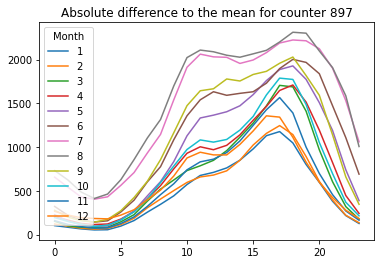

In [108]:
abs_freq = absolute.sort_values(by='SUM', ascending=False).iloc[0]
stm = abs_freq['STM']
day = abs_freq['Day']
direction = abs_freq['SUMA']
# plot original data
original_subset = df[(df['STM'] == stm) & 
                     (df['Day'] == day) & 
                     (df['SUMA'] == direction)].drop(['STM', 'Day', 'SUMA'], axis=1)
original_subset.set_index('Month').T.plot(title=f'Absolute difference to the mean for counter {stm}')

# Relative difference to the mean

In [ ]:
def relative_to_baseline(df):
    out = df.copy()
    for stm, day, direction in list(product(set(df['STM'].values), 
                                            set(df['Day'].values), 
                                            set(df['SUMA'].values))):
        for hour in set(df.columns.drop(['STM', 'Month', 'Day', 'SUMA'])):
            index = df[(df['STM'] == stm) & (df['Day'] == day) & (df['SUMA'] == direction)].index
            baseline = df.loc[index][hour].sort_values()[:4].mean()
            out.loc[index, hour] = df[hour] / baseline if baseline else 0
    return out

In [ ]:
# Computation is quite lengthy. Pre-computed dataset is available in the repository.
relative = relative_to_baseline(df)

In [95]:
# Load pre-computed data set.
relative = pd.read_csv('cars-relative.csv')
relative['SUM'] = relative.drop(['STM', 'Month', 'Day', 'SUMA'], axis=1).sum(axis=1)
relative.sort_values(by='SUM', ascending=False).head(10)

,STM,Month,Day,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,SUMA,SUM
3279,197,8,Workday,19.904259,80.123077,20.494456,13.113540,86.532923,207.373940,43.381119,...,34.561514,35.272755,46.248041,35.327092,31.259762,24.623166,22.485164,17.313747,SUMA1,1004.319054
3278,197,8,Weekend,22.170364,10.031807,62.428571,29.966667,137.285714,84.737996,67.833114,...,18.854909,31.115600,48.678321,50.048306,51.987578,27.153671,18.730620,34.340852,SUMA1,932.951897
3276,197,7,Weekend,21.455191,11.034988,32.857143,29.966667,163.857143,51.557456,49.553411,...,14.022747,21.190610,35.434629,38.617068,42.488613,27.788845,14.047965,22.893901,SUMA1,753.853137
18855,197,8,Workday,22.978225,11.162365,22.000000,24.000000,12.330997,15.370767,14.831970,...,28.262073,43.183083,61.909925,78.631416,63.572977,43.487481,36.025855,42.338846,SUMA2,749.935706
18854,197,8,Weekend,5.268133,53.142857,15.500000,0.000000,111.428571,30.600973,20.780423,...,18.371030,27.025151,41.872679,53.484031,63.476762,50.552134,28.305626,32.129281,SUMA2,732.190665
3277,197,7,Workday,14.217328,61.046154,12.687044,13.113540,51.919754,131.728100,26.749380,...,25.162453,26.408023,32.968684,28.521396,25.441590,19.466785,19.703494,13.753911,SUMA1,716.691693
18852,197,7,Weekend,5.268133,35.428571,2.214286,0.000000,111.428571,22.194113,21.971657,...,13.917707,19.500076,30.400712,40.960941,52.546324,41.432926,24.073009,30.033893,SUMA2,586.603955
18853,197,7,Workday,10.989586,11.162365,12.000000,48.000000,13.171747,11.178739,11.805037,...,20.078788,28.330619,41.782711,49.130927,45.267567,38.925857,32.777622,33.551538,SUMA2,572.656708
3274,197,6,Weekend,15.218882,1.685344,22.080000,4.794667,64.480000,17.723513,19.979935,...,7.574178,11.212860,16.370798,17.727213,18.114783,12.982948,6.436522,11.312281,SUMA1,353.920971
3281,197,9,Workday,5.213020,38.153846,10.735191,9.179478,17.306585,50.865306,10.533435,...,11.684323,12.559564,15.445183,11.519181,7.711659,6.373055,7.185980,7.119672,SUMA1,340.238772


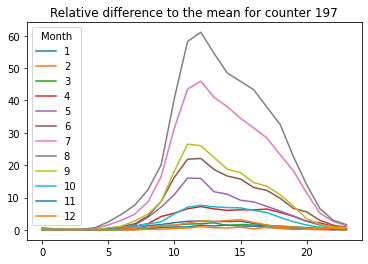

In [109]:
rel_freq = relative.sort_values(by='SUM', ascending=False).iloc[0]
stm = rel_freq['STM']
day = rel_freq['Day']
direction = rel_freq['SUMA']
# plot original data
original_subset = df[(df['STM'] == stm) & 
                     (df['Day'] == day) & 
                     (df['SUMA'] == direction)].drop(['STM', 'Day', 'SUMA'], axis=1)
original_subset.set_index('Month').T.plot(title=f'Relative difference to the mean for counter {stm}')